In [1]:
# bibliotecas
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lendo os resultados do metodo Theta
resultados_theta = pd.read_csv('resultados_theta.csv')

In [3]:
resultados_theta.tail()

,campo,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
15,NORDESTE DE SAPINHOÁ,[0.47985011 0.47556452 0.47127894 0.46699335 0...,[0.42158757 0.39677735 0. 0.38257422 0...,0.032469,0.180193,0.130408,0.003395,0.058263,0.058263
16,SUDOESTE DE SAPINHOÁ,[0.47973644 0.47545212 0.4711678 0.46688348 0...,[0.42148289 0.3966789 0. 0.38247951 0...,0.032455,0.180152,0.130381,0.003393,0.058254,0.058254
17,SUL DE TUPI,[0.72237711 0.71907334 0.71576958 0.71246581 0...,[0.78813176 0.73805851 0.75958013 0.68785673 0...,0.002384,0.048821,0.043780,0.004324,0.065755,0.065755
18,AnC_TUPI,[0.35907793 0.35225463 0.34543133 0.33860804 0...,[0.50818944 0.39195425 0.44191247 0.27542115 0...,0.012164,0.110289,0.099887,0.022234,0.149112,0.149112
19,TAMBUATÁ,[0.83592605 0.83851261 0.84109917 0.84368574 0...,[0.66275808 0.89641332 0.78856056 0.60106794 0...,0.016650,0.129033,0.107048,0.029987,0.173168,0.173168


In [4]:
#Lendo os resultados arima
resultados_arima = pd.read_csv('resultados_arima.csv')

In [5]:
resultados_arima.tail()

,campo,idx_treino,idx_teste,preds,y_test,modelo,mse,rmse,mae,mse_1,rmse_1,mae_1
15,NORDESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[0.47641068 0.48799438 0.49607293 0.49463561 0...,[0.42158757 0.39677735 0. 0.38257422 0...,"ARIMA(2,2,0)(0,0,0)[12]",0.044598,0.211183,0.173533,0.003006,0.054823,0.054823
16,SUDOESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[0.47629769 0.48787882 0.49595606 0.49452328 0...,[0.42148289 0.3966789 0. 0.38247951 0...,"ARIMA(2,2,0)(0,0,0)[12]",0.044580,0.211139,0.173501,0.003005,0.054815,0.054815
17,SUL DE TUPI,"range(0, 34)","range(34, 43)",[0.67742113 0.62685319 0.63521355 0.6690939 0...,[0.78813176 0.73805851 0.75958013 0.68785673 0...,"ARIMA(3,2,2)(0,0,1)[12]",0.018608,0.136413,0.121997,0.012257,0.110711,0.110711
18,AnC_TUPI,"range(0, 32)","range(32, 41)",[0.4152363 0.62756319 0.63900599 0.75159071 0...,[0.50818944 0.39195425 0.44191247 0.27542115 0...,"ARIMA(3,2,0)(0,0,0)[12]",0.247954,0.497949,0.444427,0.008640,0.092953,0.092953
19,TAMBUATÁ,"range(0, 28)","range(28, 35)",[0.79877049 0.78731942 0.78309023 0.78152829 0...,[0.66275808 0.89641332 0.78856056 0.60106794 0...,"ARIMA(1,0,0)(0,0,0)[12] intercept",0.014412,0.120052,0.097537,0.018499,0.136012,0.136012


In [6]:
resultados_mlp = pd.read_csv('resultados_mlp_individual.csv')

In [7]:
resultados_mlp.tail()

,campo,idx_treino,idx_teste,preds,y_test,modelo,mse,rmse,mae,mse_1,rmse_1,mae_1
15,NORDESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[0.26019392 0.346793 0.34264345 0.12110887 0...,[0.42158757 0.39677735 0. 0.38257422 0...,"MLPRegressor(hidden_layer_sizes=32, max_iter=1...",0.026301,0.162176,0.126904,0.026048,0.161394,0.161394
16,SUDOESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[-0.39658139 0.5407372 -0.01853725 -0.105772...,[0.42148289 0.3966789 0. 0.38247951 0...,"MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.110888,0.332998,0.213926,0.669229,0.818064,0.818064
17,SUL DE TUPI,"range(0, 34)","range(34, 43)",[0.65067778 0.74746549 0.59343378 0.76113182 0...,[0.78813176 0.73805851 0.75958013 0.68785673 0...,"MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.006923,0.083206,0.063859,0.018894,0.137454,0.137454
18,AnC_TUPI,"range(0, 32)","range(32, 41)",[0.31499111 0.2654124 0.34191866 0.48068005 0...,[0.50818944 0.39195425 0.44191247 0.27542115 0...,"MLPRegressor(hidden_layer_sizes=32, max_iter=1...",0.034082,0.184613,0.146281,0.037326,0.193198,0.193198
19,TAMBUATÁ,"range(0, 28)","range(28, 35)",[0.87857695 0.74828563 0.92503117 0.73038934 0...,[0.66275808 0.89641332 0.78856056 0.60106794 0...,"MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.032022,0.178948,0.172943,0.046578,0.215819,0.215819


In [8]:
resultados_lstm = pd.read_csv('resultados_lstm_individual.csv')

In [9]:
resultados_lstm.tail()

,campo,idx_treino,idx_teste,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
15,NORDESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[0.5624089 0.549126 0.53748226 0.45608997 0...,[0.42158757 0.39677735 0. 0.38257422 0...,0.044959,0.212036,0.165194,0.019831,0.140821,0.140821
16,SUDOESTE DE SAPINHOÁ,"range(0, 36)","range(36, 46)",[0.5385801 0.5218947 0.5072137 0.38916063 0...,[0.42148289 0.3966789 0. 0.38247951 0...,0.035489,0.188384,0.131900,0.013712,0.117097,0.117097
17,SUL DE TUPI,"range(0, 34)","range(34, 43)",[0.7307314 0.7412788 0.74058217 0.746268 0...,[0.78813176 0.73805851 0.75958013 0.68785673 0...,0.002407,0.049063,0.039096,0.003295,0.057400,0.057400
18,AnC_TUPI,"range(0, 32)","range(32, 41)",[0.3071484 0.3300413 0.3297457 0.34177125 0...,[0.50818944 0.39195425 0.44191247 0.27542115 0...,0.015545,0.124681,0.112320,0.040418,0.201041,0.201041
19,TAMBUATÁ,"range(0, 28)","range(28, 35)",[0.82476 0.7981449 0.8327058 0.8192215 0.766...,[0.66275808 0.89641332 0.78856056 0.60106794 0...,0.017921,0.133868,0.114100,0.026245,0.162002,0.162002


In [10]:
resultados_gru = pd.read_csv('resultados_gru.csv')

In [11]:
resultados_gru.tail()

,campo,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
15,NORDESTE DE SAPINHOÁ,[0.48397386 0.48851243 0.5266963 0.50990945 0...,[0.42158757 0.39677735 0. 0.38257422 0...,0.052065,0.228177,0.186789,0.003892,0.062386,0.062386
16,SUDOESTE DE SAPINHOÁ,[0.49326932 0.48461917 0.536194 0.50448835 0...,[0.42148289 0.3966789 0. 0.38247951 0...,0.056321,0.237320,0.197770,0.005153,0.071786,0.071786
17,SUL DE TUPI,[0.7786014 0.77870226 0.76557374 0.7727845 0...,[0.78813176 0.73805851 0.75958013 0.68785673 0...,0.003084,0.055530,0.044151,0.000091,0.009530,0.009530
18,AnC_TUPI,[0.36267692 0.35211068 0.32254124 0.3214795 0...,[0.50818944 0.39195425 0.44191247 0.27542115 0...,0.015598,0.124892,0.107900,0.021174,0.145513,0.145513
19,TAMBUATÁ,[0.82623625 0.842836 0.84577715 0.8458923 0...,[0.66275808 0.89641332 0.78856056 0.60106794 0...,0.017116,0.130828,0.106363,0.026725,0.163478,0.163478


In [12]:
resultados_rocket = pd.read_csv('resultados_rocket.csv')

In [13]:
resultados_minirocket = pd.read_csv('resultados_minirocket.csv')

In [14]:
resultados_multirocket = pd.read_csv('resultados_multirocket.csv') 

In [41]:
resultados_finais = pd.DataFrame()
resultados_finais['campo'] = resultados_theta['campo']
resultados_theta['modelo'] = 'Modelo Theta'
resultados_finais1 = pd.merge(resultados_finais, resultados_theta[['campo','modelo','mse']] , on = ['campo'] )

resultados_arima['modelo'] = 'ARIMA'
resultados_finais2 = pd.merge(resultados_finais, resultados_arima[['campo','modelo','mse']] , on = ['campo'] )

resultados_mlp['modelo'] = 'MLP'
resultados_finais3 = pd.merge(resultados_finais, resultados_mlp[['campo','modelo','mse']] , on = ['campo'] )

resultados_lstm['modelo'] = 'LSTM'
resultados_finais4 = pd.merge(resultados_finais, resultados_lstm[['campo','modelo','mse']] , on = ['campo'] )

resultados_gru['modelo'] = 'GRU'
resultados_finais5 = pd.merge(resultados_finais, resultados_gru[['campo','modelo','mse']] , on = ['campo'] )

resultados_rocket['modelo'] = 'Rocket'
resultados_finais6 = pd.merge(resultados_finais, resultados_rocket[['campo','modelo','mse']] , on = ['campo'] )

resultados_minirocket['modelo'] = 'Minirocket'
resultados_finais7 = pd.merge(resultados_finais, resultados_minirocket[['campo','modelo','mse']] , on = ['campo'] )

resultados_multirocket['modelo'] = 'Multirocket'
resultados_finais8 = pd.merge(resultados_finais, resultados_multirocket[['campo','modelo','mse']] , on = ['campo'] )


In [42]:
resultados_finais_mse = pd.concat([ resultados_finais1,
                                   resultados_finais2,
                                   resultados_finais3,
                                   resultados_finais4,
                                   resultados_finais5,
                                   resultados_finais6,
                                   resultados_finais7,
                                   resultados_finais8] )

In [53]:
df_resultados_mse = pd.DataFrame(resultados_finais_mse).rename(columns = {'campo':'Field','modelo':'Model'}).pivot(index="Field", columns="Model", values="mse")
df_resultados_mse

Model,ARIMA,GRU,LSTM,MLP,Minirocket,Modelo Theta,Multirocket,Rocket
Field,,,,,,,,
ATAPU,1.938502,0.376718,0.092891,0.033050,0.022596,0.394673,0.135036,0.179395
ATLANTA,0.039476,0.055033,0.043055,0.054339,0.043863,0.036611,0.056337,0.074250
AnC_TUPI,0.247954,0.015598,0.015545,0.034082,0.014479,0.012164,0.012581,0.018405
BAÚNA,0.006302,0.008060,0.012736,0.007699,0.004683,0.010415,0.005471,0.123613
BERBIGÃO,0.114606,0.022481,0.036034,0.050983,0.036419,0.078744,0.022531,0.026367
BÚZIOS,0.606140,0.208769,0.065306,0.061309,0.140841,0.459914,0.381069,0.137962
ITAPU,0.223866,0.113308,0.023671,0.033647,0.020707,0.256640,0.029284,0.010594
LAPA,0.073130,0.052746,0.021319,0.036000,0.041169,0.090673,0.033137,0.147183
MERO,0.339541,0.398349,0.335773,1.648323,0.223572,0.338365,0.209531,0.344286


## Complete Forecasting (all test dataset)

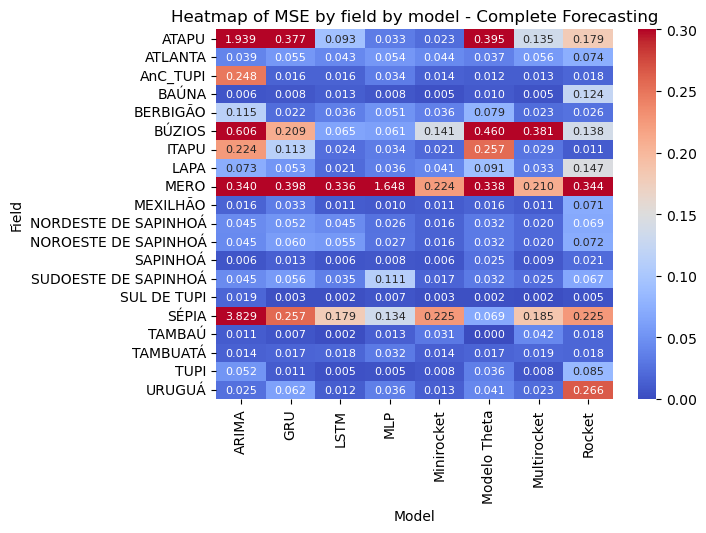

In [58]:
sns.heatmap(df_resultados_mse, annot_kws={"fontsize":8}, annot=True, vmin=0, vmax=0.3, fmt=".3f", cmap='coolwarm')
plt.title("Heatmap of MSE by field by model - Complete Forecasting")
plt.savefig("heatmap01.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [45]:
df_mse = pd.concat([ resultados_finais1,
                                   resultados_finais2,
                                   resultados_finais3,
                                   resultados_finais4,
                                   resultados_finais5,
                                   resultados_finais6,
                                   resultados_finais7,
                                   resultados_finais8] )

In [55]:
df_mse.sort_values(by='mse' , ascending=True).groupby('campo').first().round(4)

,modelo,mse
campo,,
ATAPU,Minirocket,0.0226
ATLANTA,Modelo Theta,0.0366
AnC_TUPI,Modelo Theta,0.0122
BAÚNA,Minirocket,0.0047
BERBIGÃO,GRU,0.0225
BÚZIOS,MLP,0.0613
ITAPU,Rocket,0.0106
LAPA,LSTM,0.0213
MERO,Multirocket,0.2095


In [48]:
df_mse.sort_values(by='mse' , ascending=True).groupby('campo').first().groupby('modelo').count().sort_values(by='mse')

,mse
modelo,
GRU,1
Rocket,1
MLP,2
Multirocket,2
LSTM,3
Modelo Theta,4
Minirocket,7


# One-step-ahead

In [20]:
resultados_finais = pd.DataFrame()
resultados_finais['campo'] = resultados_theta['campo']
resultados_theta['modelo'] = 'Modelo Theta'
resultados_finais1 = pd.merge(resultados_finais, resultados_theta[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_arima['modelo'] = 'ARIMA'
resultados_finais2 = pd.merge(resultados_finais, resultados_arima[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_mlp['modelo'] = 'MLP'
resultados_finais3 = pd.merge(resultados_finais, resultados_mlp[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_lstm['modelo'] = 'LSTM'
resultados_finais4 = pd.merge(resultados_finais, resultados_lstm[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_gru['modelo'] = 'GRU'
resultados_finais5 = pd.merge(resultados_finais, resultados_gru[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_rocket['modelo'] = 'Rocket'
resultados_finais6 = pd.merge(resultados_finais, resultados_rocket[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_minirocket['modelo'] = 'Minirocket'
resultados_finais7 = pd.merge(resultados_finais, resultados_minirocket[['campo','modelo','mse_1']] , on = ['campo'] )

resultados_multirocket['modelo'] = 'Multirocket'
resultados_finais8 = pd.merge(resultados_finais, resultados_multirocket[['campo','modelo','mse_1']] , on = ['campo'] )


In [27]:
df_resultados_mse1 = pd.concat([ resultados_finais1,
                                   resultados_finais2,
                                   resultados_finais3,
                                   resultados_finais4,
                                   resultados_finais5,
                                   resultados_finais6,
                                   resultados_finais7,
                                   resultados_finais8 ] )

In [30]:
pd.DataFrame(df_resultados_mse1).rename(columns = {'campo':'field','modelo':'model'})

,field,model,mse_1
0,TUPI,Modelo Theta,0.006337
1,BAÚNA,Modelo Theta,0.001657
2,URUGUÁ,Modelo Theta,0.076790
3,SAPINHOÁ,Modelo Theta,0.001183
4,MEXILHÃO,Modelo Theta,0.001194
...,...,...,...
15,NORDESTE DE SAPINHOÁ,Multirocket,0.002630
16,SUDOESTE DE SAPINHOÁ,Multirocket,0.004298
17,SUL DE TUPI,Multirocket,0.000018
18,AnC_TUPI,Multirocket,0.000006


In [32]:
df_resultados_mse1 = pd.DataFrame(df_resultados_mse1).rename(columns = {'campo':'Field','modelo':'Model'}).pivot(index="Field", columns="Model", values="mse_1")
df_resultados_mse1

model,ARIMA,GRU,LSTM,MLP,Minirocket,Modelo Theta,Multirocket,Rocket
field,,,,,,,,
ATAPU,0.000232,0.086747,0.016159,1.655799e-02,4.980689e-03,0.000406,5.815802e-02,4.004270e-02
ATLANTA,0.135805,0.198899,0.132303,2.283046e-01,5.638279e-04,0.113869,5.647239e-05,9.102112e-03
AnC_TUPI,0.008640,0.021174,0.040418,3.732560e-02,2.173197e-04,0.022234,6.479572e-06,4.768992e-03
BAÚNA,0.000013,0.003736,0.000754,2.310042e-05,4.981596e-04,0.001657,9.315310e-04,2.222691e-02
BERBIGÃO,0.013589,0.012298,0.012528,9.657121e-02,1.425071e-02,0.012294,1.113735e-02,5.304173e-04
BÚZIOS,0.441140,0.419293,0.414767,2.992685e-01,8.041863e-03,0.395756,1.275908e-02,2.579232e-02
ITAPU,0.000000,0.001545,0.002088,2.995137e-07,1.413787e-07,0.000017,1.076987e-10,1.621274e-20
LAPA,0.001187,0.087246,0.010627,2.139101e-02,1.688164e-01,0.000602,1.425435e-01,2.261742e-02
MERO,0.043493,0.084384,0.058805,1.054130e-01,9.633860e-03,0.043495,9.222821e-03,2.466772e-02


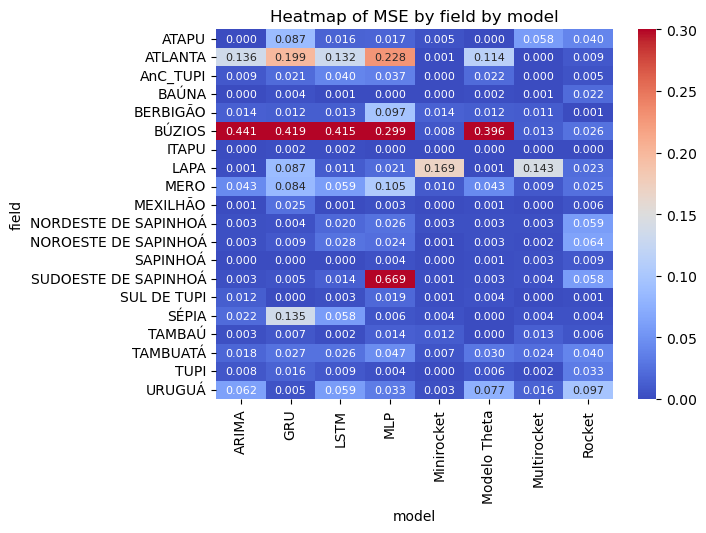

In [33]:
sns.heatmap(df_resultados_mse1, annot_kws={"fontsize":8}, annot=True, vmin=0, vmax=0.3, fmt=".3f", cmap='coolwarm')
plt.title("Heatmap of MSE by field by model")
plt.show()

In [24]:
df_mse_1 = pd.concat([ resultados_finais1,
                                   resultados_finais2,
                                   resultados_finais3,
                                   resultados_finais4,
                                   resultados_finais5,                                   
                                   resultados_finais6,
                                   resultados_finais7,
                                   resultados_finais8  ] )

In [25]:
df_mse_1.sort_values(by='mse_1' , ascending=True).groupby('campo').first().round(4)

,modelo,mse_1
campo,,
ATAPU,ARIMA,0.0002
ATLANTA,Multirocket,0.0001
AnC_TUPI,Multirocket,0.0000
BAÚNA,ARIMA,0.0000
BERBIGÃO,Rocket,0.0005
BÚZIOS,Minirocket,0.0080
ITAPU,ARIMA,0.0000
LAPA,Modelo Theta,0.0006
MERO,Multirocket,0.0092


In [39]:
df_mse_1.sort_values(by='mse_1' , ascending=True).groupby('campo').first().groupby('modelo').count().sort_values(by='mse_1')

,mse_1
modelo,
GRU,1
Rocket,1
ARIMA,3
Modelo Theta,3
Multirocket,5
Minirocket,7
